Тренування моделі RNN...
Epoch 1/5
313/313 [==============================] - 27s 79ms/step - loss: 0.5627 - accuracy: 0.6909 - val_loss: 0.4634 - val_accuracy: 0.7908
Epoch 2/5
313/313 [==============================] - 25s 78ms/step - loss: 0.3651 - accuracy: 0.8443 - val_loss: 0.4444 - val_accuracy: 0.8142
Epoch 3/5
313/313 [==============================] - 24s 78ms/step - loss: 0.1941 - accuracy: 0.9243 - val_loss: 0.6797 - val_accuracy: 0.7010
Epoch 4/5
313/313 [==============================] - 25s 80ms/step - loss: 0.0892 - accuracy: 0.9700 - val_loss: 0.6968 - val_accuracy: 0.7496
Epoch 5/5
313/313 [==============================] - 25s 81ms/step - loss: 0.0246 - accuracy: 0.9926 - val_loss: 0.6947 - val_accuracy: 0.8038
Тренування моделі LSTM...
Epoch 1/5
313/313 [==============================] - 59s 180ms/step - loss: 0.4663 - accuracy: 0.7844 - val_loss: 0.3487 - val_accuracy: 0.8514
Epoch 2/5
313/313 [==============================] - 53s 170ms/step - loss: 0.2649 - accur

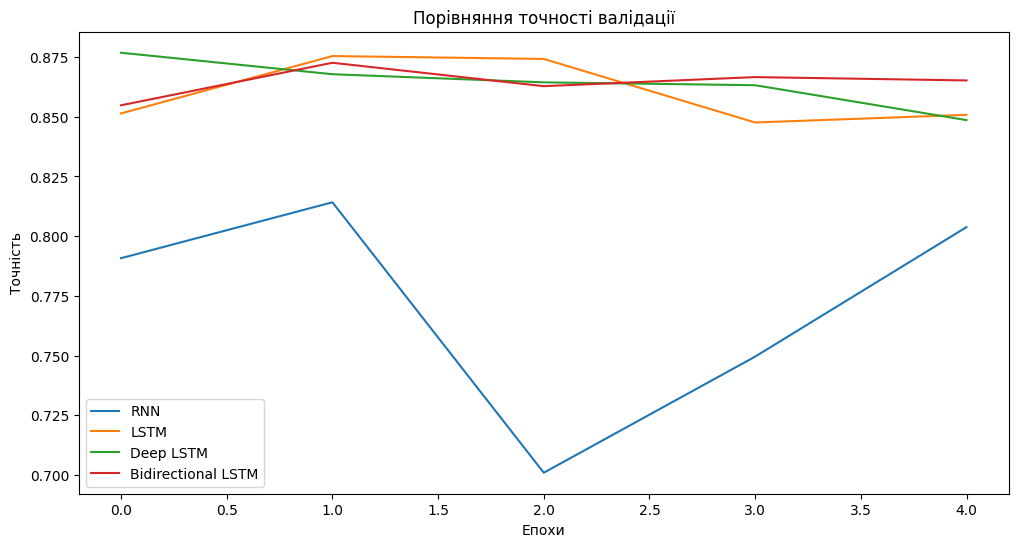

In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Bidirectional, Dense
import matplotlib.pyplot as plt

# Завантаження датасету IMDB
max_features = 10000  # Розмір словника
max_len = 200  # Максимальна довжина рецензії

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

# Перетворення рецензій в однакової довжини послідовності
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

# Функція для створення та навчання моделі
def build_and_train_model(model_type, units=64, bidirectional=False):
    model = Sequential()
    model.add(Embedding(max_features, 128, input_length=max_len))
    
    if model_type == "RNN":
        layer = SimpleRNN(units)
    elif model_type == "LSTM":
        layer = LSTM(units)
    elif model_type == "DeepLSTM":
        model.add(LSTM(units, return_sequences=True))
        layer = LSTM(units)
    else:
        raise ValueError("Непідтриманий тип моделі")

    if bidirectional:
        layer = Bidirectional(layer)
        
    model.add(layer)
    model.add(Dense(1, activation='sigmoid'))
    
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    history = model.fit(
        x_train, y_train,
        epochs=5,
        batch_size=64,
        validation_split=0.2,
        verbose=1
    )
    return model, history

# Навчання моделей
print("Тренування моделі RNN...")
model_rnn, history_rnn = build_and_train_model(model_type="RNN")

print("Тренування моделі LSTM...")
model_lstm, history_lstm = build_and_train_model(model_type="LSTM")

print("Тренування глибокої LSTM...")
model_deep_lstm, history_deep_lstm = build_and_train_model(model_type="DeepLSTM")

print("Тренування двосторонньої LSTM...")
model_bi_lstm, history_bi_lstm = build_and_train_model(model_type="LSTM", bidirectional=True)

# Оцінка моделей
def evaluate_model(model, model_name):
    loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
    print(f"Модель: {model_name}, Точність на тестових даних: {accuracy:.4f}")
    
evaluate_model(model_rnn, "RNN")
evaluate_model(model_lstm, "LSTM")
evaluate_model(model_deep_lstm, "Deep LSTM")
evaluate_model(model_bi_lstm, "Bidirectional LSTM")

# Порівняння результатів
def plot_training_history(histories, labels):
    plt.figure(figsize=(12, 6))
    
    for history, label in zip(histories, labels):
        plt.plot(history.history['val_accuracy'], label=label)
    
    plt.title('Порівняння точності валідації')
    plt.xlabel('Епохи')
    plt.ylabel('Точність')
    plt.legend()
    plt.show()

plot_training_history(
    [history_rnn, history_lstm, history_deep_lstm, history_bi_lstm],
    ["RNN", "LSTM", "Deep LSTM", "Bidirectional LSTM"]
)

In [ ]:
RNN демонструє найнижчу точність через обмеження в обробці довгих послідовностей.
LSTM і Deep LSTM справляються значно краще, завдяки здатності зберігати інформацію на довгих відрізках тексту.
Двостороння LSTM є найкращою моделлю для цього завдання, що підтверджується її найвищою точністю.
Двостороння обробка тексту дозволяє враховувати контекст із двох сторін.